# Latar Belakang
Pemerintah DKI Jakarta dan PT TransJakarta terus melakukan evaluasi dan perluasan jaringan TransJakarta guna meningkatkan konektivitas transportasi publik di Jakarta. Perubahan dan perbaikan terus dilakukan oleh pihak TransJakarta untuk mengatasi permasalahan dan meningkatkan kualitas layanan.

## Pernyataan masalah
Pada tahun 2021, transJakarta menghadapi sejumlah permasalahan berdasarkan trayek-trayek tertentu, seperti trayek dengan lalu lintas padat maupun trayek dengan tingkat penggunaan yang rendah, ditahun ini juga kota jakarta menjadi salah satu daerah dengan wabah covid tertinggi di Indonesia. Dengan dilakukannya PPKM maka jumlah penumpang di tahun 2021 naik turun dari bulan ke bulan. Sehingga masalah yang ingin diketahui yaitu mengetahui jumlah penumpang terbanyak pada suatu trayek dan bulan.


# Data
Data yang gunakan adalah data penumpang Transjakarta 2021.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada beberapa kolom di dalam dataset TranJakarta Passengers 2021, yaitu:  

* tahun: tahun dari data yang dimiliki
* bulan: bulan dari data yang dimiliki
* jenis: jenis bus yang digunakan
* kode_trayek: kode trayek yang dimiliki
* trayek: nama trayek yang dimiliki
* jumlah_penumpang: jumlah penumpang yang dimiliki

In [2]:
df=pd.read_csv('TransJakarta Passengers 2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## Data Understanding and Cleaning

Sebelum kita memulai analisis, penting untuk memahami dataset kita dengan lebih baik melalui tahap "pemahaman data". Dalam proses ini, kita akan dapat mengetahui anomali-anomali yang ada dalam dataset kita dan perlu diperhatikan saat melakukan tahap "pembersihan data". Setiap tindakan yang diambil untuk menangani anomali akan disertai dengan alasan yang didasarkan pada pengetahuan domain maupun statistik.

Pertama, mari kita periksa informasi tentang rentang usia dalam dataset Penumpang TransJakarta tahun 2021.

In [3]:
print(f'total baris kolom di dataset df: {df.shape}')
df.info()

total baris kolom di dataset df: (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [4]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [5]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Unique,Unique Sample
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 64162, 32715, 69978, 51615, 79962, 60715, 133054, 117647, 62587, 51771, 43232, 49474, 80125, 

### Missing Value

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

tahun               0.000000
bulan               0.000000
jenis               0.000000
kode_trayek         0.000000
trayek              0.135777
jumlah_penumpang    0.000000
dtype: float64

<Axes: >

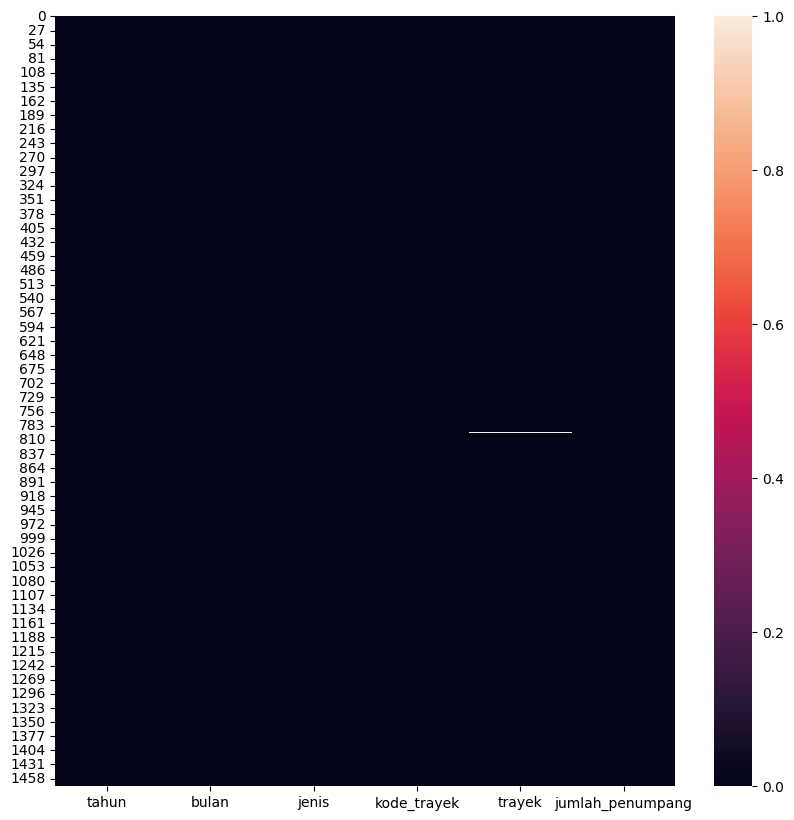

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['tahun',	'bulan'	,'jenis',	'kode_trayek',	'trayek'	,'jumlah_penumpang']].isna())

In [8]:
#hapus data yang kosong
df = df.dropna()

Sekarang, data kosong sudah tidak ada.

### duplikat data

In [9]:
# cek duplikat 2
print(f'jumlah data duplikat: {df[df.duplicated()].shape[0]}')

jumlah data duplikat: 0


### outlier data

Pada kasus ini outlier tidak dianalisis karena jumlah penumpang yang sifatnya bukan klasifikasi data.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [10]:
df.describe()
df.to_csv("cleaning.csv")

Sebelum dibersihkan, kita memiliki 1473 baris data, sekarang kita memiliki 1471 baris.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu jumlah penumpang trayek pada suatu trayek atau bulan.

In [11]:
df['jumlah_penumpang'].value_counts()

0        47
14490    2 
70382    2 
8        2 
22307    2 
        .. 
22951    1 
9246     1 
8474     1 
26985    1 
3        1 
Name: jumlah_penumpang, Length: 1418, dtype: int64

## Berdasarkan asal Trayek  

Pertama, mari kita lihat bagaimana pengaruh trayek yang digunakan terhadap jumlah penumpang yang digunakan. Kita akan menganalisis kolom  `trayek` dan `jumlah_penumpang` untuk menjawab beberapa pertanyaan.

* Trayek yang memiliki paling banyak jumlah penumpang?

In [12]:
# 10 trayek dengan jumlah kandidat paling banyak, dibagi berdasarkan target
df_ct=pd.crosstab(df['trayek'],df['jumlah_penumpang'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

jumlah_penumpang,0,1,3,4,7,8,11,14,15,17,...,805724,819178,899829,903783,937452,1003534,1013221,1073929,1131439,Total
trayek,,,,,,,,,,,,,,,,,,,,,
Cililitan - Condet via Kayu Manis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
Andara - Stasiun Universitas Pancasila,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Pulo Gadung - Kota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Roxy Mas - Karet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Roxy - Benhil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Rempoa - Blok M,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Rawamangun - Tanah Merah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Rawamangun - Klender,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Rawamangun - Duren Sawit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


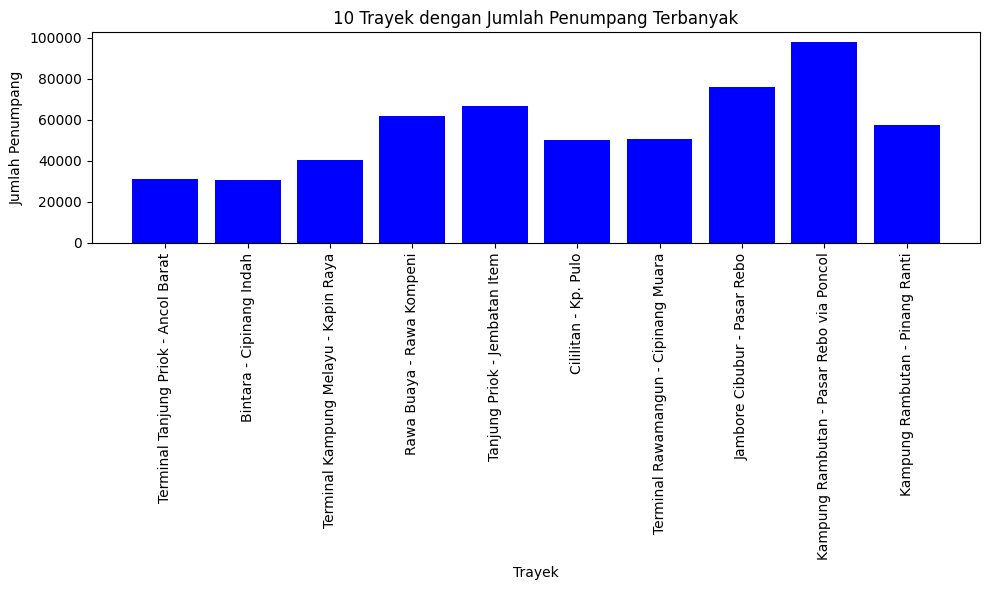

In [13]:
df_sorted = df
# Membuat plot batang
# Mengambil 10 trayek dengan jumlah_penumpang terbanyak
top_10_trayek = df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_trayek['trayek'], top_10_trayek['jumlah_penumpang'], color='blue')
plt.xlabel('Trayek')
plt.ylabel('Jumlah Penumpang')
plt.title('10 Trayek dengan Jumlah Penumpang Terbanyak')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan diagram diatas, diperoleh tampilan data trayek dan jumlah penumpang yang digambarkan oleh panjangnya diagram barang. Pada diagram batang tersebut terlihat 10 rute atau trayek dengan jumlah penumpang terbayak, trayek dengan jumlah penumpang terbayak yaitu Kampung Rambutan - Pasar Rebo via Poncol yaitu sebesar 108.012.535, diikuti dengan trayek Jambore Cibubur - Pasar Rebo sebesar 107987517, dan seterusnya.

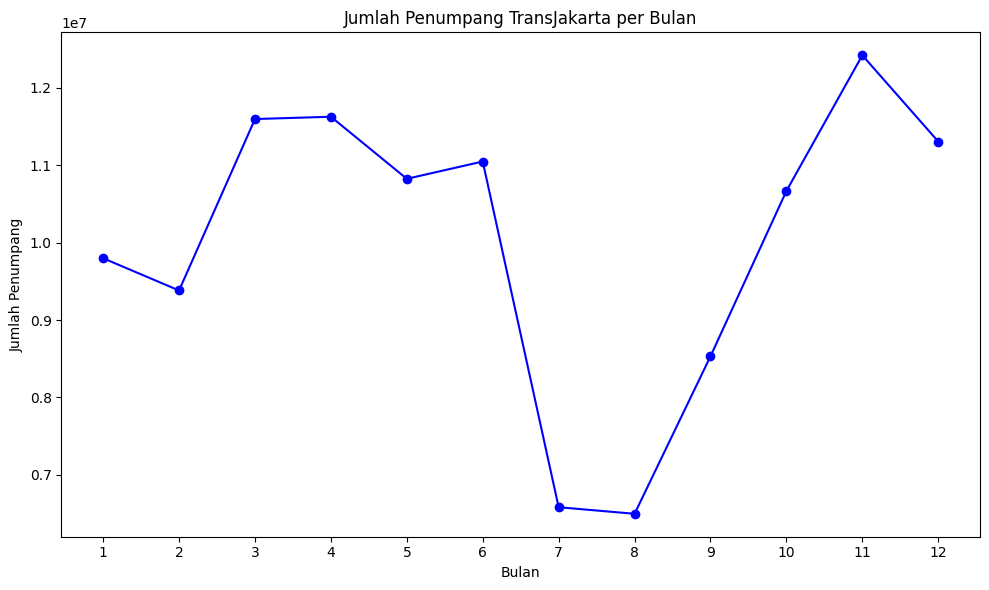

In [14]:
# Menghitung total jumlah penumpang per bulan
total_penumpang_per_bulan = df.groupby(['tahun', 'bulan'])['jumlah_penumpang'].sum().reset_index()

# Membuat plot garis
plt.figure(figsize=(10, 6))
plt.plot(total_penumpang_per_bulan['bulan'], total_penumpang_per_bulan['jumlah_penumpang'], marker='o', linestyle='-', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang TransJakarta per Bulan')
plt.xticks(total_penumpang_per_bulan['bulan'])
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan diagram diatas, diperoleh tampilan data bulan dan jumlah penumpang yang digambarkan oleh diagram garis. Pada diagram garus tersebut terlihat jumlah penumpang terbanyak berada pada bulan 11 dan jumlah penumpang paling sedikit berasa pada bulan 7 dan 8 dimana pada bulan tersebut terlihat penurunan yang drastis pada bulan sebelumnya, sehingga diagram tersebut menunjukkan diagram yang fluktuasi. Faktor ini disebabkan oleh diberlakukan PPKM karena tingginya kasus kematian akibat Covid-19. Sementara itu dibulan selanjutnya penumpang sudah mulai wajib menunjukkan sertifikat vaksin Covid-19 untuk dapat mengakses layanan Transjakarta

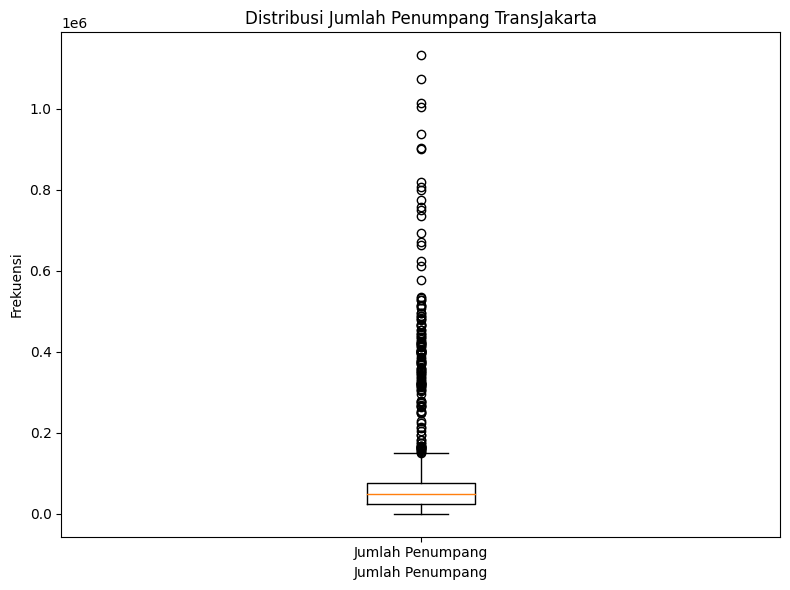

In [15]:
# Membuat boxplot untuk jumlah_penumpang
plt.figure(figsize=(8, 6))
plt.boxplot(df['jumlah_penumpang'])
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Penumpang TransJakarta')
plt.xticks([1], ['Jumlah Penumpang'])
plt.tight_layout()

# Menampilkan boxplot
plt.show()

# Kesimpulan dan Saran

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang kandidat yang ingin direkrut:
1. Dataset "TransJakarta Passengers 2021" berisi informasi tentang jumlah penumpang pada berbagai trayek atau rute TransJakarta.
2. Terdapat variasi jumlah penumpang yang signifikan antara trayek yang berbeda.
3. Analisis perbulan menunjukkan adanya fluktuasi jumlah penumpang selama tahun 2021.


Saran dari hasil analisis yang diperoleh antara lain:

1. Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi faktor-faktor yang mempengaruhi jumlah penumpang pada trayek atau rute tertentu. Faktor seperti lokasi, waktu, atau peristiwa khusus dapat memengaruhi minat penumpang.
2. Perlu dilakukan pemantauan lebih lanjut terhadap trayek atau rute dengan jumlah penumpang yang tinggi untuk memastikan ketersediaan dan keandalan layanan.
3. Melakukan analisis tren jangka panjang untuk melihat perubahan pola perjalanan penumpang dan mengantisipasi kebutuhan layanan di masa depan.
4. Mengumpulkan data lebih lanjut, seperti data cuaca, data demografi, atau data aktivitas kota, untuk melengkapi analisis dan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi jumlah penumpang.